# Keras Classification Project

This is a coding along project, which main purpose is to discover this new tool :) let's go

This is a classification problem, and we'll try to classify correctly if a tumor is malign or benign

In this project we're going to deal with overfitting though early stopping callbacks ans dropout layers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data
df=pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
#let's take a look on what we have
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Some exporatory data analysis following (EDA)

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

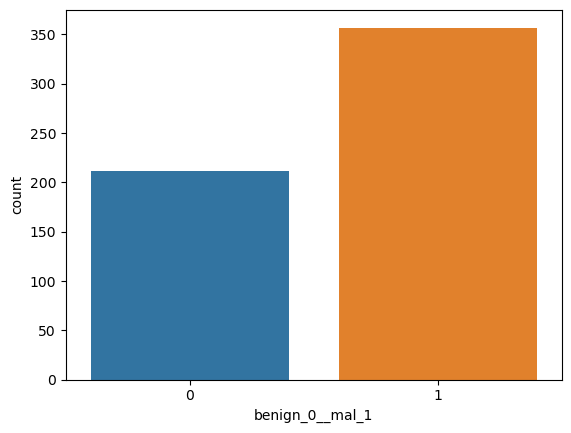

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

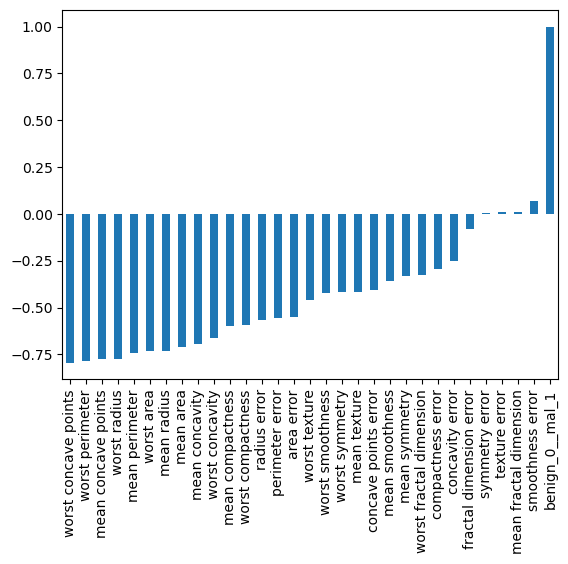

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

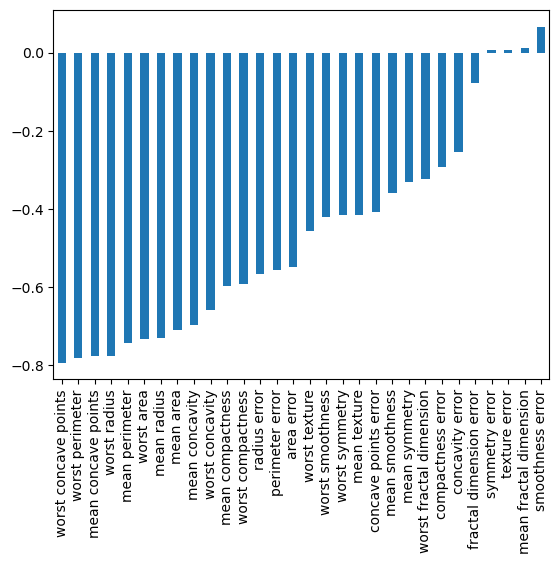

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

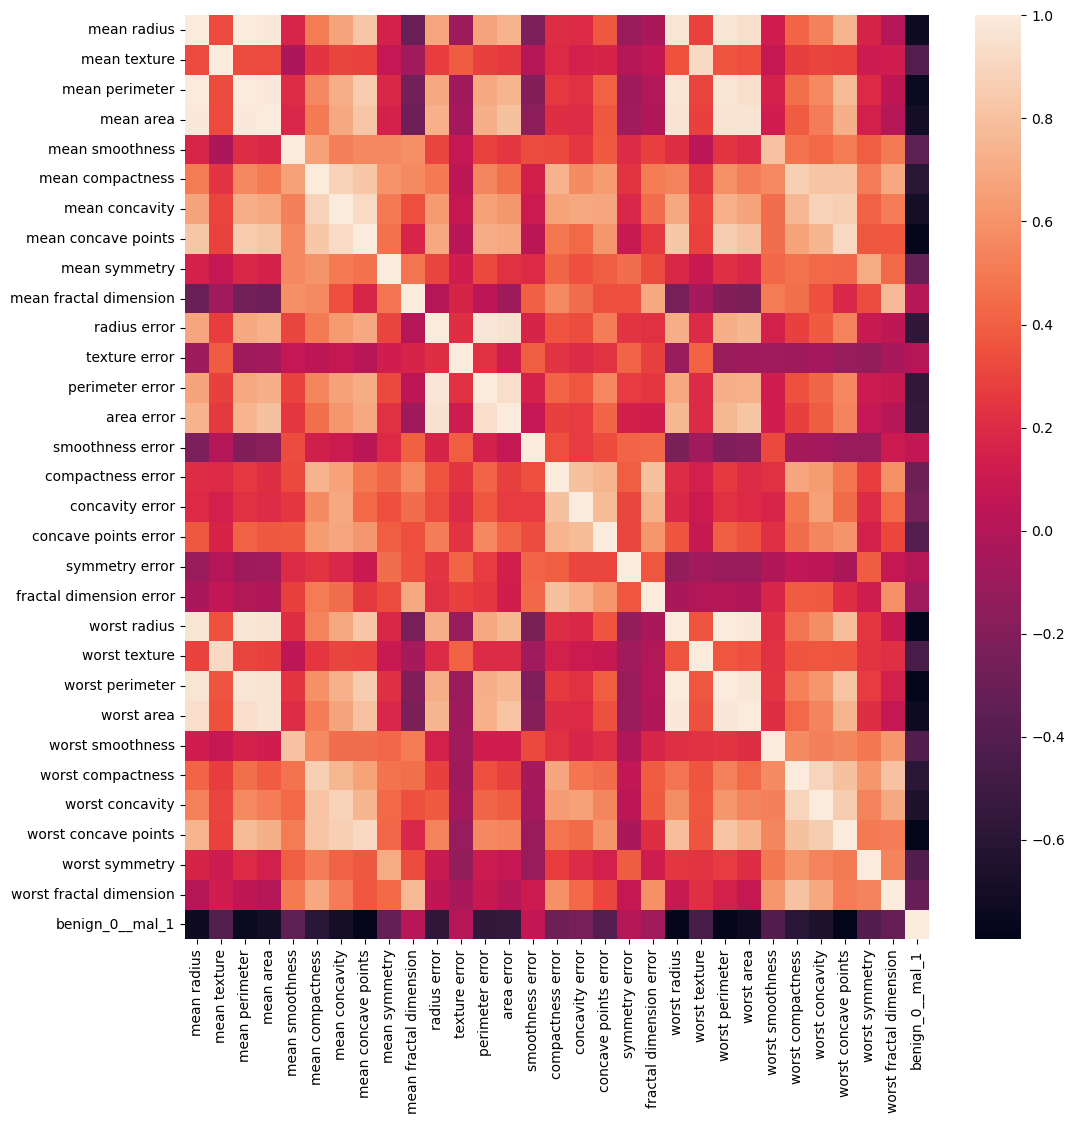

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

Let's split the data

In [12]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

And scale the data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

Let's create the model - Dealing with overfitting 

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

# on the training set there are 30 features, so let's start our model with this number of neurons 
# and for the next layer we'll curt that in half
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# this is a BINARY CLASSIFICATION problem, which requires the activation function to be 'sigmoid' (output from 0 to 1)
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

and train our model  :) 

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6733 - val_loss: 0.6511
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6375 - val_loss: 0.6183
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6054 - val_loss: 0.5839
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5668 - val_loss: 0.5418
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5231 - val_loss: 0.4937
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4729 - val_loss: 0.4397
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4188 - val_loss: 0.3841
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3670 - val_loss: 0.3343
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3230 - val_loss: 0.2939
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2886 - val_loss: 0.2598
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1178
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1109
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.1075
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.1103
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.1110
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.1112
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1084
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.1151
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.1144
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1080
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.1308
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.1298
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.1203
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.1301
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.1223
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1225
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1178
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.1309
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.1208
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.1303
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.1341
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1400
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1376
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.1395
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.1418
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1416
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.1383
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.1348
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0299 - val_loss: 0.1432
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0285 - val_loss: 0.1357
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.1440
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.1609
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.1507
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1431
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.1513
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1409
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.1368
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1477
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.1423
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.1604
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.1530
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.1749
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.1522
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.1690
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.1734
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.1551
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.1549
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.1849
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.1478
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.1894
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.1675
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.2040
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.1803
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.1788
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1911
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1860
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.1711
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.1946
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.1751
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0113 - val_loss: 0.1978
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.2381
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.1847
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.2371
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1859
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.2396
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.1974
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.2201
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.1987
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2337
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.1994
Epoc

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.673265,0.651070
1,0.637534,0.618270
2,0.605417,0.583950
3,0.566817,0.541792
4,0.523096,0.493735
...,...,...
595,0.007035,0.205300
596,0.007744,0.239311
597,0.006345,0.205823
598,0.007487,0.259514


<AxesSubplot:>

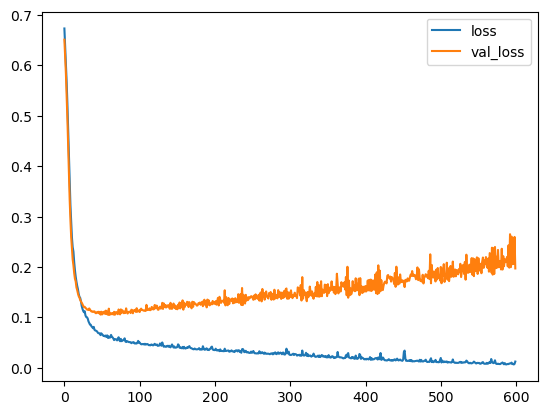

In [26]:
losses.plot()

THIS IS A PERFECT EXAMPLE OF OVERFITTING

in the beginning, both validation and training losses were decreasing, which is good but in a certain point a split occurs. the training data (blue) continues to decrease but the validation data (orange) starts to increase, which means we are overfitting to our training set

In summary we have evidence that we're training for too many epochs

let's try to use the early stopping method by applying tensorflow keras callbacks based on the validation loss

In [46]:
# Let's redefine the model here so we don't need to bo back to run it again

model = Sequential()

# on the training set there are 30 features, so let's start our model with this number of neurons 
# and for the next layer we'll curt that in half
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# this is a BINARY CLASSIFICATION problem, which requires the activation function to be 'sigmoid' (output from 0 to 1)
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
# we'll start to use the callbacks

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [50]:
# define the variable

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
#In `min` mode, training will stop when the quantity monitored has stopped decreasing

In [51]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6581 - val_loss: 0.6298
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6237 - val_loss: 0.5959
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5893 - val_loss: 0.5609
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.5259
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5210 - val_loss: 0.4891
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4863 - val_loss: 0.4521
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4495 - val_loss: 0.4140
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4121 - val_loss: 0.3760
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3770 - val_loss: 0.3383
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3410 - val_loss: 0.3029
Epoch 11

In [52]:
# what happens is that the model will try to run 600 epochs, unless the early stopping is trigered
# which, in this case, was

checking the model loss

In [53]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

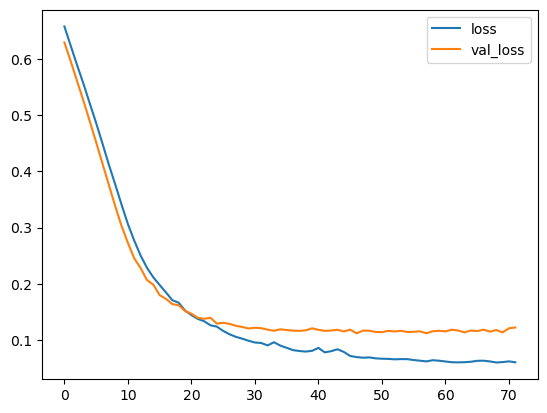

In [54]:
model_loss.plot()

In [55]:
# this method early stopped our model from letting the validation loss increase even more

We can add DROPOUT LAYERS to try prevent the overfitting

The dropout layers will turn off a percentage of the neurons randomly

For that, let's paste our model below and make the modifications to redefine it

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
# one of the parameters on the dropout function is the rate. 
# This indicates the fraction of the neurons that you'll ramdomly turn off after each batch of training
# common values are between 0.2 and 0.5 

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7110 - val_loss: 0.6842
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6816 - val_loss: 0.6705
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6712 - val_loss: 0.6565
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6601 - val_loss: 0.6430
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6503 - val_loss: 0.6272
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6376 - val_loss: 0.6048
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6070 - val_loss: 0.5812
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6043 - val_loss: 0.5560
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5659 - val_loss: 0.5258
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5552 - val_loss: 0.4911
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1215 - val_loss: 0.0849
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1249 - val_loss: 0.0924
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1317 - val_loss: 0.0889
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1094 - val_loss: 0.0841
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1416 - val_loss: 0.0997
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1078 - val_loss: 0.0848
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.0874
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1148 - val_loss: 0.0806
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1159 - val_loss: 0.0868
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.1027
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0962 - val_loss: 0.0809
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0755 - val_loss: 0.0871
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 0.0979
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0814 - val_loss: 0.0883
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0695 - val_loss: 0.0842
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 0.0999
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 0.0874
Epoch 170: early stopping


In [59]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

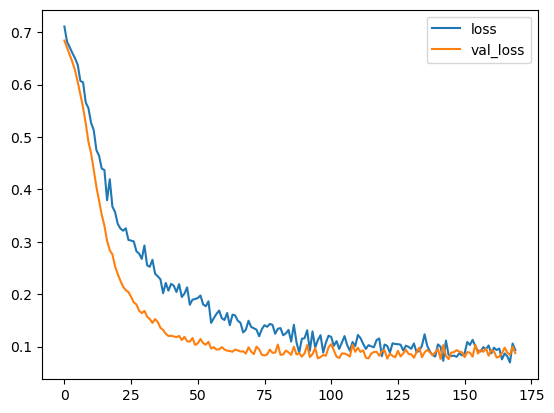

In [60]:
model_loss.plot()

we've got fantastic results! Training loss and validation loss are decreasing and flatting on similar rates and both converges to the same point

So, adding the early stopping and the dropout layers had significantly increased performance!!

Let's do a full evaluation on our classes

In [63]:
model.predict(X_test) > 0.5

5/5 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [64]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 1ms/step


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [69]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]


As we can see, all results were very good